In [1]:
import pandas as pd
import os
import re
import csv
import math
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

filename1 = 'iris_train.csv'
filename2 = 'iris_dev.csv'
filename3 = 'iris_test.csv'
df_train = pd.read_csv(filename1)
df_dev = pd.read_csv(filename2)
df_test = pd.read_csv(filename3)



In [3]:
#Number of Sample belonging to each class

display(df_train.loc[df_train['class'] == 'Iris-setosa'].shape)
display(df_train.loc[df_train['class'] == 'Iris-virginica'].shape)
display(df_train.loc[df_train['class'] == 'Iris-virginica'].shape)






(30, 5)

(30, 5)

(30, 5)

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

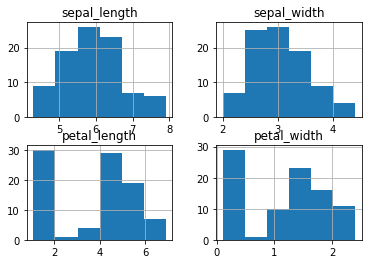

In [4]:
df_train.hist(bins=6)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']


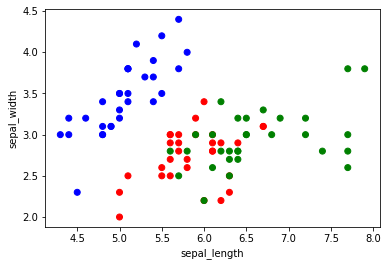

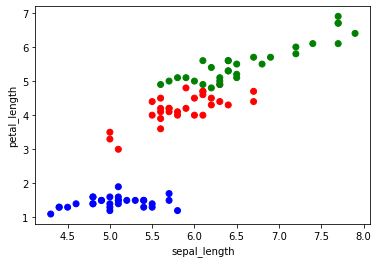

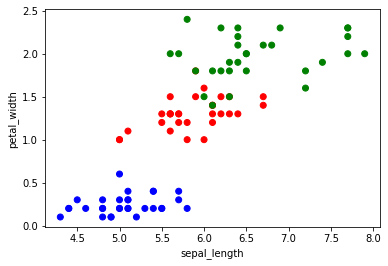

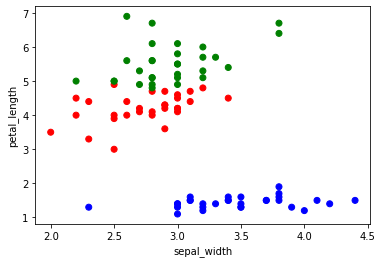

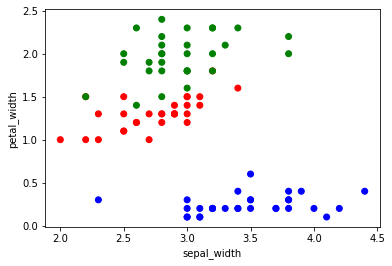

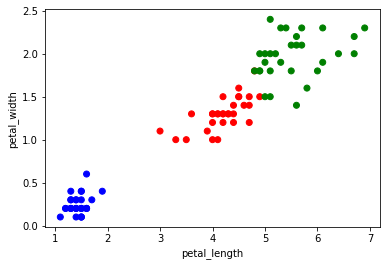

In [5]:
# creating scatter plot
features = list(df_train.columns.values)
print (features)
i=0
color = []
for l in df_train['class']: 
    if l == 'Iris-setosa':
        color.append('blue') 
    elif l == 'Iris-versicolor':
        color.append('red')
    else:
        color.append('green')
        
for feature1 in features:
    for feature2 in features[i+1:]:
        if feature1=='class' or feature2=='class':
            continue
        else:
            x = df_train[feature1]
            y = df_train[feature2]
            p = df_train['class']
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.scatter( x = df_train[feature1],y=df_train[feature2],color=color)
            plt.show()
    i+=1



In [6]:
##Implement KNN

#euclidean distance helper function
def calculate_dist(row1,row2):
    distance = 0.0
    d = ()
    for i in range(len(row1)-1):
        distance = distance + (row1[i]-row2[i])**2
    distance = math.sqrt(distance)
    return ((row1[-1],row2[-1],distance))
 

# craete list of sitance for each data in training set    
def calculate_knn(df_train,df_dev,k,accuracy_metric):
    accuracy = []
    train_df_rows = df_train.shape[0]
    dev_df_rows  = df_dev.shape[0]
    for row1 in range(dev_df_rows):
        class_dist = list()
        for row2 in range(train_df_rows):
            d = calculate_dist(list(df_train.iloc[row2]),list(df_dev.iloc[row1]))
            class_dist.append(d)
        class_dist.sort(key = lambda x: x[2])
        individual_accuracy = calculate_accuracy(class_dist,k)
        accuracy.append(individual_accuracy)
    print("accuracy at k = {} is {}".format(k,sum(accuracy)/len(accuracy) * 100) )
    accuracy_metric.append((k,sum(accuracy)/len(accuracy) * 100))   
        

# calculate accuracy of each row in dev/test dataset        
def calculate_accuracy(class_dict,k):
    count = 0
    for i in range(k):
        if class_dict[i][0] == class_dict[i][1]:
            count+=1
    return count/k


accuracy_metric = list()
i=1
while i <= 19:
    calculate_knn(df_train,df_dev,i,accuracy_metric)
    i+=2


accuracy at k = 1 is 96.66666666666667
accuracy at k = 3 is 92.22222222222223
accuracy at k = 5 is 93.33333333333333
accuracy at k = 7 is 91.9047619047619
accuracy at k = 9 is 90.74074074074076
accuracy at k = 11 is 90.30303030303031
accuracy at k = 13 is 90.25641025641026
accuracy at k = 15 is 90.00000000000001
accuracy at k = 17 is 89.60784313725492
accuracy at k = 19 is 89.12280701754382


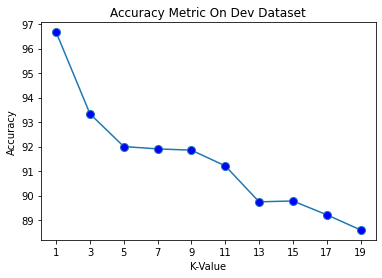

In [15]:
df = pd.DataFrame(accuracy_metric, columns=['K-Value','Accuracy'])

def plot_accracy_metric(df):
    plt.plot(df['K-Value'],df['Accuracy'], marker='o', markerfacecolor='blue', markersize=8)
    plt.xlabel('K-Value')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Metric On Dev Dataset')
    plt.xticks(np.arange(1, 21, 2))
    plt.show()
    
plot_accracy_metric(df)    

In [10]:
# accuracy_metric = list()
calculate_knn(df_train,df_test,1,accuracy_metric)



accuracy at k = 1 is 96.66666666666667


accuracy at k = 1 is 33.33333333333333
accuracy at k = 3 is 33.33333333333333
accuracy at k = 5 is 33.33333333333333
accuracy at k = 7 is 33.33333333333333
accuracy at k = 9 is 33.33333333333333
accuracy at k = 11 is 33.33333333333333
accuracy at k = 13 is 33.33333333333333
accuracy at k = 15 is 33.33333333333333
accuracy at k = 17 is 33.33333333333333
accuracy at k = 19 is 33.33333333333333


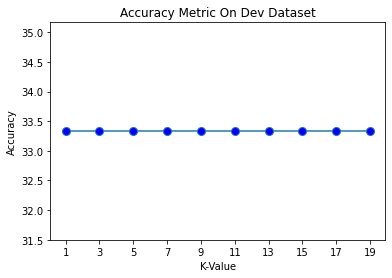

In [17]:
#Bonus question

'''
#l1 norm - Manhatten distance
def calculate_dist(row1,row2):
    distance = 0.0
    d = ()
    for i in range(len(row1)-1):
        distance = distance + abs(row1[i]-row2[i])
    return ((row1[-1],row2[-1],distance))

'''

#Cosine similarity
def calculate_dist(row1,row2):
    dot_product = 0.0
    x_sq_sum = 0.0
    y_sq_sum = 0.0
    d = ()
    for i in range(len(row1)-1):
        dot_product = dot_product + row1[i]*row2[i]
        x_sq_sum = x_sq_sum + row1[i]**2
        y_sq_sum = y_sq_sum + row2[i]**2
    distance = dot_product / (x_sq_sum * y_sq_sum)
    return ((row1[-1],row2[-1],distance))





accuracy_metric = list()
i=1
while i <= 19:
    calculate_knn(df_train,df_dev,i,accuracy_metric)
    i+=2
df = pd.DataFrame(accuracy_metric, columns=['K-Value','Accuracy'])
plot_accracy_metric(df)

